In [1]:
%load_ext memory_profiler

# Import dataset in to dataframe

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

train_df = pd.read_csv("../input/train.csv")
test_df = pd.read_csv("../input/test.csv")
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = -1

# Analyze train and test data

In [3]:
print("Sample insincere questions")
train_df.loc[train_df['target'] == 1].sample(10)

Sample insincere questions


,qid,question_text,target
1169030,e5131ef6e7108b499072,"Why do Russians lie about their history, what they have invented, etc.?",1
857155,a7f0cab9fbf793e3c47b,"Why do Americans usually get pissed off when you speak a different language in front of them, even when you're not in the U.S?",1
62415,0c409518d04ea447d03a,"Why doesn't Brazilians, argentinos and uruguaios go back to their country?",1
759858,94e12c23ff0c28a2aaa3,"In Christianity, if we can just forgive everybody, than why don’t Christians follow this?",1
1103894,d858a5204928bab5f854,"I nearly suffocated whilst travelling on a coach full of East Asians in the UK with all sunroofs closed. Is this the ""bad air"" people talk of about East Asians?",1
986312,c13a592453d77bfdcf04,Why all these idiots that are against Republic of Macedonia don't get in hell?,1
842101,a50be202c1bdc5950cbe,Are American gays mentally ill- it seems they are misogynists who can't get along with straight people?,1
803619,9d76383d3019e92d2f19,How common is for hillbillies to marry latinos?,1
827112,a218913182e67d5beb45,"If Queen Elizabeth demanded that all Canadians jump, would they be obliged to do so?",1
191285,2565f633aa37c9feefbb,How do I get girls to like me and also how do I use chloroform?,1


In [4]:
print("Sample sincere questions")
train_df.loc[train_df['target'] == 0].sample(10)

Sample sincere questions


,qid,question_text,target
788248,9a6dcb5857d9d27d6dc6,What are some fun facts about Neptune?,0
775641,97ee8141d0c489059673,Is it safe to take my Bernese Mountain dog for walks if he's only 4 months old?,0
1122244,dbe5a7029309068f22b3,I will be driving from San Diego to Montreal in about 10 days - what are some ways I keep eating healthy?,0
1158744,e30b891c43bbe788c6df,What's it like living in India? How's the cost of living? Is it safe or is there a lot of crime? Do they have grocery stores or do you get food from markets? Is it hard to live there if you only speak English?,0
1189773,e92744c2fed80885c8e2,Where is ladies service bar in Mumbai?,0
1230049,f10b7e44414dbb25f175,Why my penis bleed on first sex?,0
720603,8d104b4652977e36876e,We have Armed security guards in shopping malls. Why is it such a horrible idea to have a few armed guards at high schools?,0
288131,386e9ade298d72e0cf37,What are the best online part time jobs for a polymer engineer?,0
364486,47742984713bd27d546e,Where can I find a support group in the US for people with stage 4 lung cancer?,0
571030,6fe479fc0c17eb1c2897,What significance did the song that plays in Pete and Pete's opening credits have?,0


In [5]:
import numpy as np


target_ratios = train_df.target.value_counts(normalize=True)

print(target_ratios)

target_ratios.plot(kind='bar', title='Ratios (target)')

0    0.937946
1    0.062054
Name: target, dtype: float64


In [6]:
print('Average word length of questions in train is {0:.0f}.'.format(np.mean(train_df['question_text'].apply(lambda x: len(x.split())))))
print('Average word length of questions in test is {0:.0f}.'.format(np.mean(test_df['question_text'].apply(lambda x: len(x.split())))))

Average word length of questions in train is 13.
Average word length of questions in test is 13.


In [7]:
print('Max word length of questions in train is {0:.0f}.'.format(np.max(train_df['question_text'].apply(lambda x: len(x.split())))))
print('Max word length of questions in test is {0:.0f}.'.format(np.max(test_df['question_text'].apply(lambda x: len(x.split())))))

Max word length of questions in train is 134.
Max word length of questions in test is 87.


In [8]:
print('Average character length of questions in train is {0:.0f}.'.format(np.mean(train_df['question_text'].apply(lambda x: len(x)))))
print('Average character length of questions in test is {0:.0f}.'.format(np.mean(test_df['question_text'].apply(lambda x: len(x)))))

Average character length of questions in train is 71.
Average character length of questions in test is 70.


In [9]:
print('Max character length of questions in train is {0:.0f}.'.format(np.max(train_df['question_text'].apply(lambda x: len(x)))))
print('Max character length of questions in test is {0:.0f}.'.format(np.max(test_df['question_text'].apply(lambda x: len(x)))))

Max character length of questions in train is 1017.
Max character length of questions in test is 588.


In [10]:
print('p999 character length of questions in train is {0:.0f}.'.format(np.percentile(train_df['question_text'].apply(lambda x: len(x)), 99.9)))
print('p999 character length of questions in test is {0:.0f}.'.format(np.percentile(test_df['question_text'].apply(lambda x: len(x)), 99.9)))

p999 character length of questions in train is 249.
p999 character length of questions in test is 249.


## **Preparing the text data**

First, we will iterate over the text questions are stored, and format them into a list.

In [11]:
X_train = train_df['question_text'].fillna('+++').tolist()
X_val = val_df['question_text'].fillna('+++').tolist()
X_test = test_df['question_text'].fillna('+++').tolist()

y_train = train_df['target']
y_val = val_df['target']

print('Found %s training questions.' % len(X_train))
print('Found %s validation questions.' % len(X_val))
print('Found %s test questions.' % len(X_test))

Found 1175509 training questions.
Found 130613 validation questions.
Found 56370 test questions.


In [12]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 300
MAX_WORDS = 100000

tokenizer = Tokenizer(num_words=MAX_WORDS, lower=True, split=' ', 
                       char_level=False, oov_token=None, document_count=0,
                      )
                                   
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen=MAX_SEQUENCE_LENGTH)

X_val = tokenizer.texts_to_sequences(X_val)
X_val = pad_sequences(X_val, maxlen=MAX_SEQUENCE_LENGTH)

X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH)

print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Using TensorFlow backend.


Shape of X_train: (1175509, 250)
Shape of y_train: (1175509,)
Found 209541 unique tokens.


# Oversample training data

In [13]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42, ratio = 1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)



1    0.5
0    0.5
Name: 0, dtype: float64


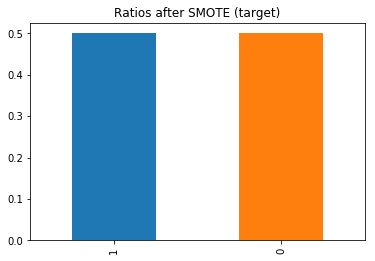

In [15]:

balanced_train_df = pd.DataFrame()
balanced_train_df[0] = np.array(y_train)

target_ratios = balanced_train_df[0].value_counts(normalize=True)

print(target_ratios)

target_ratios.plot(kind='bar', title='Ratios after SMOTE (target)')

# Setup Embedding layer

In [16]:
from gensim.models import KeyedVectors
import numpy as np
import os

def loadEmbeddings(path, dimensions, mode='r', encoding=None, errors=None):
    print('Loading embeddings from: %s' %path)
    embeddings = {}
    f = open(path, buffering=((2<<16) + 8), mode=mode, encoding=encoding, errors=errors)
    for line in f:
        values = line.split()
        word = ''.join(values[:-dimensions])
        coefs = np.asarray(values[-dimensions:], dtype='float32')
        embeddings[word] = coefs
    f.close()
    print('Found %s word vectors.' % len(embeddings))
    return embeddings

def loadEmbeddingsGensim(path, dimensions, binary=True):
    print('Loading embeddings from: %s' %path)
    embeddings = {}
    gensim_vecs = KeyedVectors.load_word2vec_format(path, binary=binary)
    for word, vector in zip(gensim_vecs.vocab, gensim_vecs.vectors):
        coefs = np.asarray(vector[-dimensions:], dtype='float32')
        embeddings[word] = coefs
    print('Found %s word vectors.' % len(embeddings))
    return embeddings
    

In [17]:
def getEmbeddingMatrix(embedding, word_index, dimensions):
    embedding_matrix = np.zeros((len(word_index) + 1, dimensions))
    for word, i in word_index.items():
        embedding_vector = embedding.get(word)
        if embedding_vector is not None:
            if i >= MAX_WORDS:
                continue
            # words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector
    return embedding_matrix

In [18]:
from keras.layers import Embedding

embedding_layers = {}

In [19]:
glove_path = os.path.join('..', 'input', 'embeddings', 'glove.840B.300d', 'glove.840B.300d.txt')
embeddings_index = loadEmbeddings(glove_path, EMBEDDING_DIM)
embedding_matrix = getEmbeddingMatrix(embeddings_index, word_index, EMBEDDING_DIM)
del embeddings_index
np.save('glove.npy', embedding_matrix)
embedding_layers['glove'] = Embedding(len(word_index) + 1, EMBEDDING_DIM, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=False)

Loading embeddings from: ../input/embeddings/glove.840B.300d/glove.840B.300d.txt
Found 2195892 word vectors.
peak memory: 5765.53 MiB, increment: 0.65 MiB


In [20]:
paragram_path = os.path.join('..', 'input', 'embeddings', 'paragram_300_sl999', 'paragram_300_sl999.txt')
embeddings_index = loadEmbeddings(paragram_path, EMBEDDING_DIM, encoding='utf8', errors='ignore')
embedding_matrix = getEmbeddingMatrix(embeddings_index, word_index, EMBEDDING_DIM)
del embeddings_index
np.save('paragram.npy', embedding_matrix)
embedding_layers['paragram'] = Embedding(len(word_index) + 1, EMBEDDING_DIM, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=False)

Loading embeddings from: ../input/embeddings/paragram_300_sl999/paragram_300_sl999.txt
Found 1703663 word vectors.
peak memory: 5080.59 MiB, increment: 0.00 MiB


In [21]:
wiki_path = os.path.join('..', 'input', 'embeddings', 'wiki-news-300d-1M', 'wiki-news-300d-1M.vec')
embeddings_index = loadEmbeddings(wiki_path, EMBEDDING_DIM)
embedding_matrix = getEmbeddingMatrix(embeddings_index, word_index, EMBEDDING_DIM)
del embeddings_index
np.save('wiki.npy', embedding_matrix)
embedding_layers['wiki'] = Embedding(len(word_index) + 1, EMBEDDING_DIM, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=False)

Loading embeddings from: ../input/embeddings/wiki-news-300d-1M/wiki-news-300d-1M.vec
Found 999995 word vectors.
peak memory: 5272.27 MiB, increment: 0.00 MiB


In [22]:
google_news_path = os.path.join('..', 'input', 'embeddings', 'GoogleNews-vectors-negative300', 'GoogleNews-vectors-negative300.bin')
embeddings_index = loadEmbeddingsGensim(google_news_path, EMBEDDING_DIM)
embedding_matrix = getEmbeddingMatrix(embeddings_index, word_index, EMBEDDING_DIM)
del embeddings_index
np.save('google_news.npy', embedding_matrix)
embedding_layers['google_news'] = Embedding(len(word_index) + 1, EMBEDDING_DIM, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=False)

Loading embeddings from: ../input/embeddings/GoogleNews-vectors-negative300/GoogleNews-vectors-negative300.bin
Found 3000000 word vectors.
peak memory: 5463.97 MiB, increment: 0.00 MiB


In [23]:
del word_index

In [24]:
%memit foo = 0

peak memory: 5462.97 MiB, increment: 0.00 MiB


# Setup model

In [25]:
%%time 

from keras.layers import Dense, Dropout, Input, GlobalMaxPool1D
from keras.layers import Conv1D, MaxPooling1D, Embedding, Bidirectional
from keras.layers import Activation, BatchNormalization, CuDNNGRU
from keras.layers import SpatialDropout1D, Concatenate, Flatten, Reshape
from keras.regularizers import l2
from keras.models import Model


inp = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

a = embedding_layers['glove'] (inp)
a = Bidirectional(CuDNNGRU(64, return_sequences=True))(a)
a = GlobalMaxPool1D()(a)
a = Dense(16, use_bias=False)(a)
a = BatchNormalization()(a)
a = Activation("relu")(a)
a = Dropout(0.1)(a)

b = embedding_layers['paragram'] (inp)
b = Bidirectional(CuDNNGRU(64, return_sequences=True))(b)
b = GlobalMaxPool1D()(b)
b = Dense(16, use_bias=False)(b)
b = BatchNormalization()(b)
b = Activation("relu")(b)
b = Dropout(0.1)(b)

c = embedding_layers['wiki'] (inp)
c = Bidirectional(CuDNNGRU(64, return_sequences=True))(c)
c = GlobalMaxPool1D()(c)
c = Dense(16, use_bias=False)(c)
c = BatchNormalization()(c)
c = Activation("relu")(c)
c = Dropout(0.1)(c)

d = embedding_layers['google_news'] (inp)
d = Bidirectional(CuDNNGRU(64, return_sequences=True))(d)
d = GlobalMaxPool1D()(d)
d = Dense(16, use_bias=False)(d)
d = BatchNormalization()(d)
d = Activation("relu")(d)
d = Dropout(0.1)(d)

x = Concatenate(axis=1)([a, b, c, d])
x = Dense(64, use_bias=False)(x)
x = BatchNormalization()(x)
#kernel_regularizer=l2(0.01)
x = Activation("relu")(x)
x = Dense(1, use_bias=False)(x)
x = BatchNormalization()(x)
out = Activation("sigmoid")(x)

model = Model(inp, out)

print(model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 250)          0                                            
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 250, 300)     62862600    input_1[0][0]                    
__________________________________________________________________________________________________
embedding_14 (Embedding)        (None, 250, 300)     62862600    input_1[0][0]                    
__________________________________________________________________________________________________
embedding_21 (Embedding)        (None, 250, 300)     62862600    input_1[0][0]                    
__________________________________________________________________________________________________
embedding_

In [26]:
%%time 

from keras.layers import Dense, Dropout, Input, GlobalMaxPool1D
from keras.layers import Conv1D, MaxPooling1D, Embedding, Bidirectional
from keras.layers import Activation, BatchNormalization, CuDNNGRU
from keras.layers import SpatialDropout1D, Concatenate, Flatten, Reshape
from keras.regularizers import l2
from keras.models import Model


inp = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

a = embedding_layers['glove'] (inp)
a = Bidirectional(CuDNNGRU(64, return_sequences=True))(a)
a = GlobalMaxPool1D()(a)
a = Dense(16, use_bias=False)(a)
a = BatchNormalization()(a)
a = Activation("relu")(a)
a = Dropout(0.1)(a)

b = embedding_layers['paragram'] (inp)
b = Bidirectional(CuDNNGRU(64, return_sequences=True))(b)
b = GlobalMaxPool1D()(b)
b = Dense(16, use_bias=False)(b)
b = BatchNormalization()(b)
b = Activation("relu")(b)
b = Dropout(0.1)(b)

c = embedding_layers['wiki'] (inp)
c = Bidirectional(CuDNNGRU(64, return_sequences=True))(c)
c = GlobalMaxPool1D()(c)
c = Dense(16, use_bias=False)(c)
c = BatchNormalization()(c)
c = Activation("relu")(c)
c = Dropout(0.1)(c)

d = embedding_layers['google_news'] (inp)
d = Bidirectional(CuDNNGRU(64, return_sequences=True))(d)
d = GlobalMaxPool1D()(d)
d = Dense(16, use_bias=False)(d)
d = BatchNormalization()(d)
d = Activation("relu")(d)
d = Dropout(0.1)(d)

x = Concatenate(axis=1)([a, b, c, d])
x = Dense(32, use_bias=False)(x)
x = BatchNormalization()(x)
#kernel_regularizer=l2(0.01)
x = Activation("relu")(x)
x = Dense(1, use_bias=False)(x)
x = BatchNormalization()(x)
out = Activation("sigmoid")(x)

model = Model(inp, out)

print(model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 250)          0                                            
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 250, 300)     62862600    input_2[0][0]                    
__________________________________________________________________________________________________
embedding_14 (Embedding)        (None, 250, 300)     62862600    input_2[0][0]                    
__________________________________________________________________________________________________
embedding_21 (Embedding)        (None, 250, 300)     62862600    input_2[0][0]                    
__________________________________________________________________________________________________
embedding_

In [27]:
%%time 

from keras.layers import Dense, Dropout, Input, GlobalMaxPool1D
from keras.layers import Conv1D, MaxPooling1D, Embedding, Bidirectional
from keras.layers import Activation, BatchNormalization, CuDNNGRU
from keras.layers import SpatialDropout1D, Average, Flatten, Reshape
from keras.regularizers import l2
from keras.models import Model


inp = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

a = embedding_layers['glove'] (inp)
a = Bidirectional(CuDNNGRU(64, return_sequences=True))(a)
a = GlobalMaxPool1D()(a)
a = Dense(16, use_bias=False)(a)
a = BatchNormalization()(a)
a = Activation("relu")(a)
a = Dropout(0.1)(a)

b = embedding_layers['paragram'] (inp)
b = Bidirectional(CuDNNGRU(64, return_sequences=True))(b)
b = GlobalMaxPool1D()(b)
b = Dense(16, use_bias=False)(b)
b = BatchNormalization()(b)
b = Activation("relu")(b)
b = Dropout(0.1)(b)

c = embedding_layers['wiki'] (inp)
c = Bidirectional(CuDNNGRU(64, return_sequences=True))(c)
c = GlobalMaxPool1D()(c)
c = Dense(16, use_bias=False)(c)
c = BatchNormalization()(c)
c = Activation("relu")(c)
c = Dropout(0.1)(c)

d = embedding_layers['google_news'] (inp)
d = Bidirectional(CuDNNGRU(64, return_sequences=True))(d)
d = GlobalMaxPool1D()(d)
d = Dense(16, use_bias=False)(d)
d = BatchNormalization()(d)
d = Activation("relu")(d)
d = Dropout(0.1)(d)

x = Average()([a, b, c, d])
x = Dense(32, use_bias=False)(x)
x = BatchNormalization()(x)
#kernel_regularizer=l2(0.01)
x = Activation("relu")(x)
x = Dense(1, use_bias=False)(x)
x = BatchNormalization()(x)
out = Activation("sigmoid")(x)

model = Model(inp, out)

print(model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 250)          0                                            
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 250, 300)     62862600    input_3[0][0]                    
__________________________________________________________________________________________________
embedding_14 (Embedding)        (None, 250, 300)     62862600    input_3[0][0]                    
__________________________________________________________________________________________________
embedding_21 (Embedding)        (None, 250, 300)     62862600    input_3[0][0]                    
__________________________________________________________________________________________________
embedding_

# Compile the model

In [28]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model

Use model checkpointing to save the model that attains the best validation loss.

In [29]:
%%time 

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=2, batch_size=1024)

Train on 2205128 samples, validate on 130613 samples
Epoch 1/2
2205128/2205128 [==============================] - 681s 309us/step - loss: 0.2027 - acc: 0.9592 - val_loss: 0.1646 - val_acc: 0.9498
Epoch 2/2
2205128/2205128 [==============================] - 674s 306us/step - loss: 0.0953 - acc: 0.9728 - val_loss: 0.1267 - val_acc: 0.9538
CPU times: user 16min 10s, sys: 2min 52s, total: 19min 3s
Wall time: 22min 38s


# serialize model to JSON

In [30]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
print("Saved model to disk")

Saved model to disk


# serialize weights to HDF5

In [31]:
model.save_weights("weights.h5")
print("Saved model weights to disk")

Saved model weights to disk


# Predict validation labels

In [32]:
%%time

pred_val = model.predict([X_val], batch_size=1024, verbose=1)

130613/130613 [==============================] - 15s 113us/step
CPU times: user 13.7 s, sys: 2.86 s, total: 16.6 s
Wall time: 14.8 s


# Find best threshold

In [33]:
from sklearn.metrics import f1_score

def bestThreshold(y_true,y_pred):
    idx = 0
    cur_f1 = 0
    max_f1 = 0
    thres = 0
    for idx in np.arange(0.1, 0.501, 0.01):
        cur_f1 = f1_score(y_true, np.array(y_pred)> idx)
        if cur_f1 > max_f1:
            max_f1 = cur_f1
            thres = idx
    print('best threshold is {:.4f} with F1 score: {:.4f}'.format(thres, max_f1))
    return thres
threshold = bestThreshold(y_val,pred_val)

best threshold is 0.3900 with F1 score: 0.6244


# Predict test labels

In [34]:
%%time

pred_test = model.predict([X_test], batch_size=1024, verbose=1)

56370/56370 [==============================] - 6s 110us/step
CPU times: user 5.74 s, sys: 1.18 s, total: 6.92 s
Wall time: 6.18 s


# Prepare submission

In [35]:
submission_df = pd.DataFrame({"qid":test_df["qid"].values})
submission_df['prediction'] = (pred_test > threshold).astype(int)
submission_df.to_csv("submission.csv", index=False)